<a href="https://colab.research.google.com/github/KithminiP/KithminiP/blob/main/Kamuu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installing and loading libraries

In [1]:
!pip install hvplot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.0/161.0 kB 5.3 MB/s eta 0:00:00


In [2]:
!pip install -U matplotlib pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 44.6 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.6.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [3]:
!pip install --upgrade hvplot panel bokeh ipykernel holoviews ipywidgets

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.4/27.4 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 22.1 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.9
    Uninstalling widgetsnbextension-3.6.9:
      Successfully uninstalled widgetsnbextension-3.6.9
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
  

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import hvplot.pandas
import numpy as np
import seaborn as sns
import panel as pn
import holoviews as hv
import panel as pn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

pn.extension(comms='colab')

## Loading CSV files

In [5]:
from google.colab import files
uploaded = files.upload()

Saving customers Kamuu.csv to customers Kamuu.csv


In [6]:
uploaded = files.upload()

Saving order Kamuu.csv to order Kamuu.csv


In [7]:
uploaded = files.upload()

Saving order_items Kamuu.csv to order_items Kamuu.csv


## Loading Data in to Pandas

In [9]:
# Load the data from CSV
customer_df = pd.read_csv('customers Kamuu.csv')
order_df = pd.read_csv('order Kamuu.csv')
order_items_df = pd.read_csv('order_items Kamuu.csv')

# Preview the data
print(customer_df.head())

   id  source  order_id first_name last_name  account_brand address_1  \
0   1     2.0       1.0      Kelee        D.              1       NaN   
1   2     2.0       2.0        aje        A.              1       NaN   
2   3     2.0       3.0      suren        K.              1       NaN   
3   4     2.0     101.0      Miard        Z.              1       NaN   
4   5     2.0       5.0        NaN       NaN              1       NaN   

  address_2 email password  ... otp status  password_reset_code  \
0       NaN   NaN      NaN  ... NaN      0                  NaN   
1       NaN   NaN      NaN  ... NaN      0                  NaN   
2       NaN   NaN      NaN  ... NaN      0                  NaN   
3       NaN   NaN      NaN  ... NaN      0                  NaN   
4       NaN   NaN      NaN  ... NaN      0                  NaN   

  password_reset_code_status contact_access_code    address_type notes  \
0                          0          292 79 974  STREET_ADDRESS   NaN   
1         

In [10]:
print(order_df.head())

   id  shop_id  platform_id                       remote_order_id  \
0   1        1            2  eb67db81-7e9e-4338-a4e1-345b60a1efde   
1   2        1            3  80b661f9-8dcf-48c4-b4f1-5caae2b97138   
2   3        1            3  90b9e65e-e2f4-414c-9abe-eb41c1750315   
3   4        1            2  72046a81-c4fb-40f8-9f79-5f7384dd1ebf   
4   5        1            3  b233779e-f7e7-4c19-94fd-c49b20693bcf   

  display_order_id   delivery_date_time  total_amount  sub_total  total_fee  \
0            1EFDE  2023-06-05 15:32:20          3450       3450          0   
1            97138  2023-06-06 12:59:32           850        850          0   
2            50315  2023-06-06 20:22:30          4560       4560          0   
3            D1EBF  2023-06-07 12:14:00          1700       1700          0   
4            93BCF  2023-06-07 15:42:43           250        250          0   

   discount  ... payment_method is_scheduled is_table_order  tip  \
0         0  ...            NaN           

In [11]:
print(order_items_df.head())

   id  order_id  item_id  quantity  price_per_item  total  original_price  \
0   1         1       65       1.0             700    700             700   
1   2         1       64       1.0             850    850             850   
2   3         1       65       1.0             850    850             850   
3   4         1       64       1.0            1050   1050            1050   
4   5         2       81       1.0             850    850             850   

   is_sale  discount_amount     status           created_at  \
0        0                0  COMPLETED  2023-06-05 14:17:22   
1        0                0  COMPLETED  2023-06-05 14:17:22   
2        0                0  COMPLETED  2023-06-05 14:17:22   
3        0                0  COMPLETED  2023-06-05 14:17:22   
4        0                0  COMPLETED  2023-06-06 11:53:19   

            updated_at        item_name                 category_name  \
0  2023-06-06 16:03:04       🥤My Shake🥤  Create My Own, Create My Own   
1  2023-06-0

## EDA

### Checking missing value

In [12]:
print(customer_df.isnull().sum())

id                              0
source                        112
order_id                      112
first_name                      1
last_name                       6
account_brand                   0
address_1                     129
address_2                     151
email                          39
password                       40
apple_id                      148
phone                           0
country_code                   40
city                          151
state                         151
postcode                      151
country                       151
remote_id                     152
type                            7
created_at                      0
updated_at                      0
latitude                      151
longitude                     151
reset_token                   152
remember_token                152
stripe_id                     152
otp                           152
status                          0
password_reset_code           152
password_reset

In [13]:
print(order_df.isnull().sum())

id                         0
shop_id                    0
platform_id                0
remote_order_id            0
display_order_id           0
delivery_date_time         0
total_amount               0
sub_total                  0
total_fee                  0
discount                   0
vouchers                  53
status                     0
cancelled_reason         130
order_type_id              0
note                     115
created_at                 0
updated_at                 0
customer_name              0
user_id                  138
customer_id                0
delivery_location_id     138
shipping_method            0
shipping_total            51
shipping_tax             138
total_tax                  0
cash_due                   0
surcharge                  0
contact_access_code       86
testing_order              0
cancelled_by_customer      0
payment_method            53
is_scheduled               0
is_table_order             0
tip                        0
tip_percentage

In [14]:
print(order_items_df.isnull().sum())

id                   0
order_id             0
item_id              0
quantity             0
price_per_item       0
total                0
original_price       0
is_sale              0
discount_amount      0
status               0
created_at           0
updated_at           0
item_name            0
category_name      169
modifiers            0
tax                  0
note               252
dtype: int64


### Checking table stats

In [15]:
print(customer_df.describe())

               id     source    order_id  account_brand  country_code  \
count  152.000000  40.000000   40.000000     152.000000    112.000000   
mean    81.578947   2.100000   52.750000       1.927632     68.767857   
std     46.955880   0.981887   50.668733       0.838652     54.953868   
min      1.000000   1.000000    1.000000       1.000000      1.000000   
25%     41.750000   2.000000   13.750000       1.000000     44.000000   
50%     82.500000   2.000000   25.500000       2.000000     44.000000   
75%    122.250000   2.000000  104.250000       2.000000     44.000000   
max    161.000000   8.000000  146.000000       4.000000    199.000000   

       remote_id   latitude  longitude  reset_token  remember_token  \
count        0.0   1.000000   1.000000          0.0             0.0   
mean         NaN  51.436201  -0.501531          NaN             NaN   
std          NaN        NaN        NaN          NaN             NaN   
min          NaN  51.436201  -0.501531          NaN       

In [16]:
print(order_df.describe())

               id  shop_id  platform_id  total_amount    sub_total  total_fee  \
count  138.000000    138.0   138.000000    138.000000   138.000000      138.0   
mean    71.717391      1.0     3.884058   1877.449275  2039.427536        0.0   
std     42.643487      0.0     1.832682   1412.441144  1541.376235        0.0   
min      1.000000      1.0     1.000000    200.000000   200.000000        0.0   
25%     35.250000      1.0     2.000000    799.000000   799.000000        0.0   
50%     69.500000      1.0     4.000000   1499.000000  1700.000000        0.0   
75%    108.750000      1.0     4.000000   2380.000000  2599.750000        0.0   
max    146.000000      1.0    12.000000   8780.000000  8780.000000        0.0   

          discount  order_type_id  user_id  customer_id  ...  testing_order  \
count   138.000000     138.000000      0.0   138.000000  ...          138.0   
mean    162.485507       2.601449      NaN    64.289855  ...            0.0   
std     497.178378       0.520245

In [17]:
print(order_items_df.describe())

               id    order_id     item_id    quantity  price_per_item  \
count  253.000000  253.000000  253.000000  253.000000      253.000000   
mean   133.470356   71.557312  131.371542    1.312253      846.324111   
std     80.823711   41.407308   70.764843    0.557531      313.281375   
min      1.000000    1.000000    1.000000    1.000000      150.000000   
25%     64.000000   41.000000   69.000000    1.000000      690.000000   
50%    127.000000   66.000000  111.000000    1.000000      799.000000   
75%    204.000000  107.000000  169.000000    2.000000     1090.000000   
max    276.000000  146.000000  310.000000    4.000000     1698.000000   

             total  original_price  is_sale  discount_amount    tax  
count   253.000000      253.000000    253.0            253.0  253.0  
mean   1155.177866      846.324111      0.0              0.0    0.0  
std     701.617131      313.281375      0.0              0.0    0.0  
min     150.000000      150.000000      0.0              0.0  

### Check Data types

In [18]:
print(customer_df.dtypes)

id                              int64
source                        float64
order_id                      float64
first_name                     object
last_name                      object
account_brand                   int64
address_1                      object
address_2                      object
email                          object
password                       object
apple_id                       object
phone                          object
country_code                  float64
city                           object
state                          object
postcode                       object
country                        object
remote_id                     float64
type                           object
created_at                     object
updated_at                     object
latitude                      float64
longitude                     float64
reset_token                   float64
remember_token                float64
stripe_id                     float64
otp         

In [19]:
print(order_df.dtypes)

id                         int64
shop_id                    int64
platform_id                int64
remote_order_id           object
display_order_id          object
delivery_date_time        object
total_amount               int64
sub_total                  int64
total_fee                  int64
discount                   int64
vouchers                  object
status                    object
cancelled_reason          object
order_type_id              int64
note                      object
created_at                object
updated_at                object
customer_name             object
user_id                  float64
customer_id                int64
delivery_location_id     float64
shipping_method           object
shipping_total           float64
shipping_tax             float64
total_tax                float64
cash_due                 float64
surcharge                float64
contact_access_code       object
testing_order              int64
cancelled_by_customer      int64
payment_me

In [20]:
print(order_items_df.dtypes)

id                   int64
order_id             int64
item_id              int64
quantity           float64
price_per_item       int64
total                int64
original_price       int64
is_sale              int64
discount_amount      int64
status              object
created_at          object
updated_at          object
item_name           object
category_name       object
modifiers           object
tax                  int64
note                object
dtype: object


## Data Visualization

In [21]:
print(customer_df.columns)

Index(['id', 'source', 'order_id', 'first_name', 'last_name', 'account_brand',
       'address_1', 'address_2', 'email', 'password', 'apple_id', 'phone',
       'country_code', 'city', 'state', 'postcode', 'country', 'remote_id',
       'type', 'created_at', 'updated_at', 'latitude', 'longitude',
       'reset_token', 'remember_token', 'stripe_id', 'otp', 'status',
       'password_reset_code', 'password_reset_code_status',
       'contact_access_code', 'address_type', 'notes', 'expo_token',
       'deleted_at', 'is_real'],
      dtype='object')


In [22]:
print(order_df.columns)

Index(['id', 'shop_id', 'platform_id', 'remote_order_id', 'display_order_id',
       'delivery_date_time', 'total_amount', 'sub_total', 'total_fee',
       'discount', 'vouchers', 'status', 'cancelled_reason', 'order_type_id',
       'note', 'created_at', 'updated_at', 'customer_name', 'user_id',
       'customer_id', 'delivery_location_id', 'shipping_method',
       'shipping_total', 'shipping_tax', 'total_tax', 'cash_due', 'surcharge',
       'contact_access_code', 'testing_order', 'cancelled_by_customer',
       'payment_method', 'is_scheduled', 'is_table_order', 'tip',
       'tip_percentage', 'table_id', 'table_order_method_id',
       'device_platform', 'order_delayed', 'unique_order_id'],
      dtype='object')


In [23]:
print(order_items_df.columns)

Index(['id', 'order_id', 'item_id', 'quantity', 'price_per_item', 'total',
       'original_price', 'is_sale', 'discount_amount', 'status', 'created_at',
       'updated_at', 'item_name', 'category_name', 'modifiers', 'tax', 'note'],
      dtype='object')


### 1.Order Trend over Months

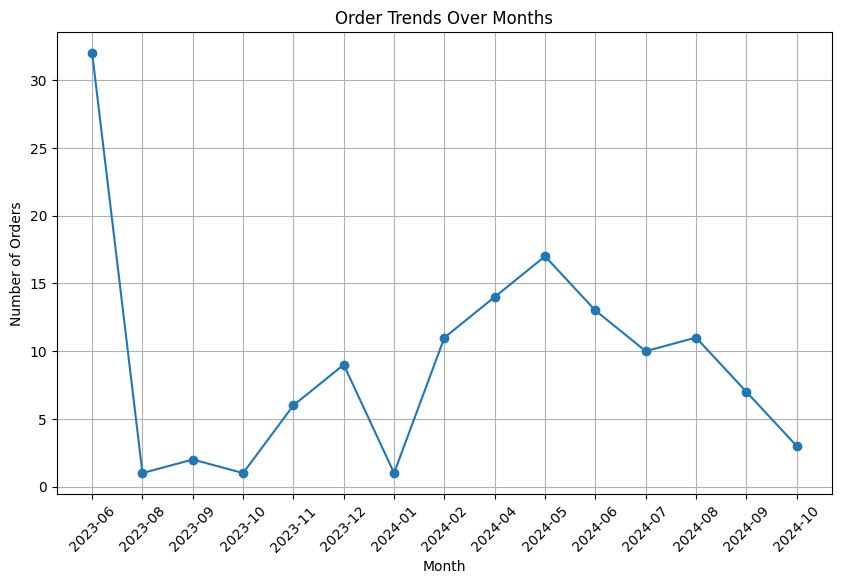

In [24]:
# Convert 'created_at' to datetime in the orders DataFrame
order_df['created_at'] = pd.to_datetime(order_df['created_at'])

# Group by month to count number of orders
orders_by_month = order_df.groupby(order_df['created_at'].dt.to_period('M')).size()

# Plot the number of orders over time (months)
plt.figure(figsize=(10,6))
plt.plot(orders_by_month.index.astype(str), orders_by_month.values, marker='o')
plt.title('Order Trends Over Months')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### 2.Order trend over the time of the day

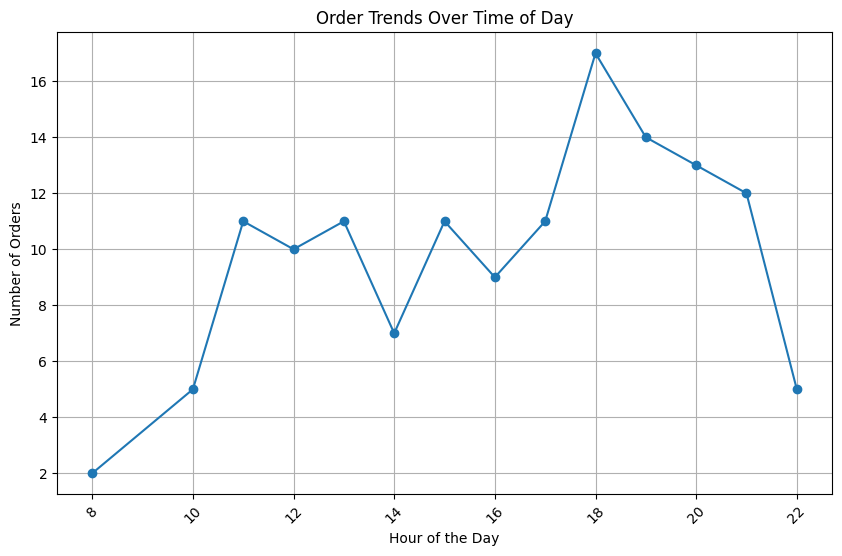

In [25]:
# Convert 'created_at' to datetime in the orders DataFrame
order_df['created_at'] = pd.to_datetime(order_df['created_at'])

# Group by hour to count the number of orders by time of the day
orders_by_hour = order_df.groupby(order_df['created_at'].dt.hour).size()

# Plot the number of orders over the time of day (hours)
plt.figure(figsize=(10,6))
plt.plot(orders_by_hour.index, orders_by_hour.values, marker='o')
plt.title('Order Trends Over Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### 3.Top Selling Items

<ipython-input-26-25f941b2d379>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_selling_items.values, y=top_selling_items.index, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

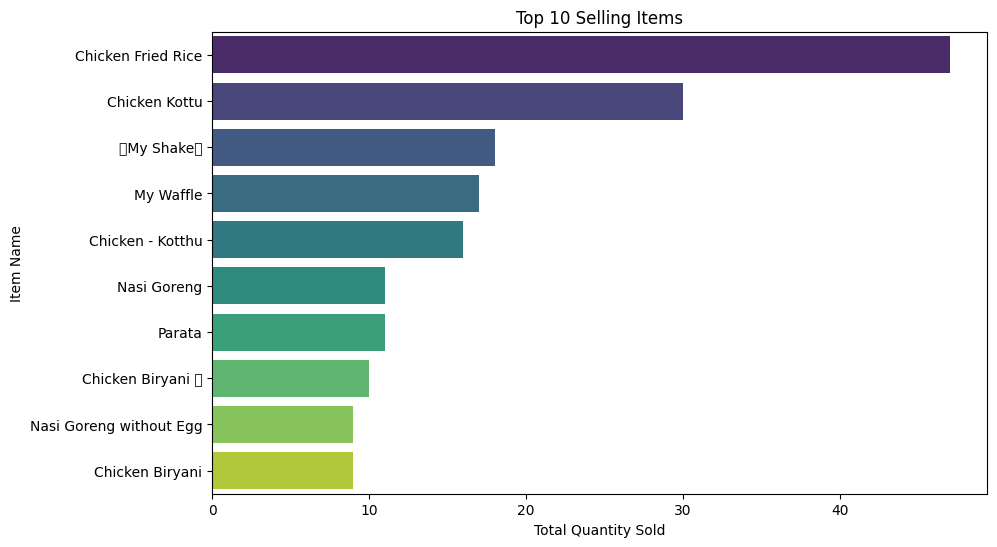

In [26]:
# Group by 'item_name' and sum the 'quantity' ordered
top_selling_items = order_items_df.groupby('item_name')['quantity'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_selling_items.values, y=top_selling_items.index, palette='viridis')
plt.title('Top 10 Selling Items')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Item Name')
plt.show()

### 4.Order Status Distribution

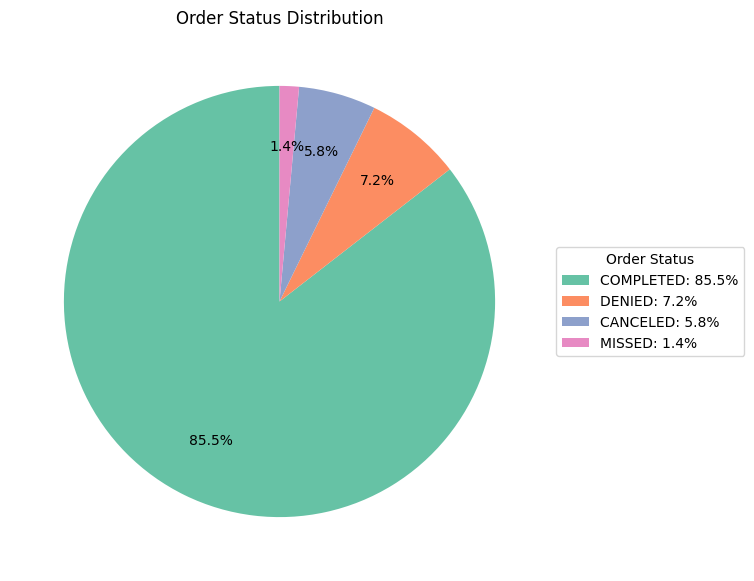

In [27]:
# Count orders by 'status'
order_status_distribution = order_df['status'].value_counts()

# Calculate percentages
percentages = (order_status_distribution / order_status_distribution.sum()) * 100
legend_labels = [f'{status}: {percentage:.1f}%' for status, percentage in zip(order_status_distribution.index, percentages)]

# Create the pie chart
plt.figure(figsize=(7,7))
wedges, texts, autotexts = plt.pie(order_status_distribution, labels=None, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))

# Adding title
plt.title('Order Status Distribution')

# Add legend with percentages
plt.legend(wedges, legend_labels, title='Order Status', loc='center left', bbox_to_anchor=(1, 0.5))

# Position percentages outside the chart
for i, text in enumerate(autotexts):
    x, y = text.get_position()  # Get the x and y coordinates
    text.set_position((x * 1.2, y * 1.2))  # Move the text slightly outward

# Remove the default inside labels
for text in texts:
    text.set_text('')

# Show the plot
plt.show()

<ipython-input-28-8bbbe10cee67>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=order_status_distribution.index, y=order_status_distribution.values, palette="Set2")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureW

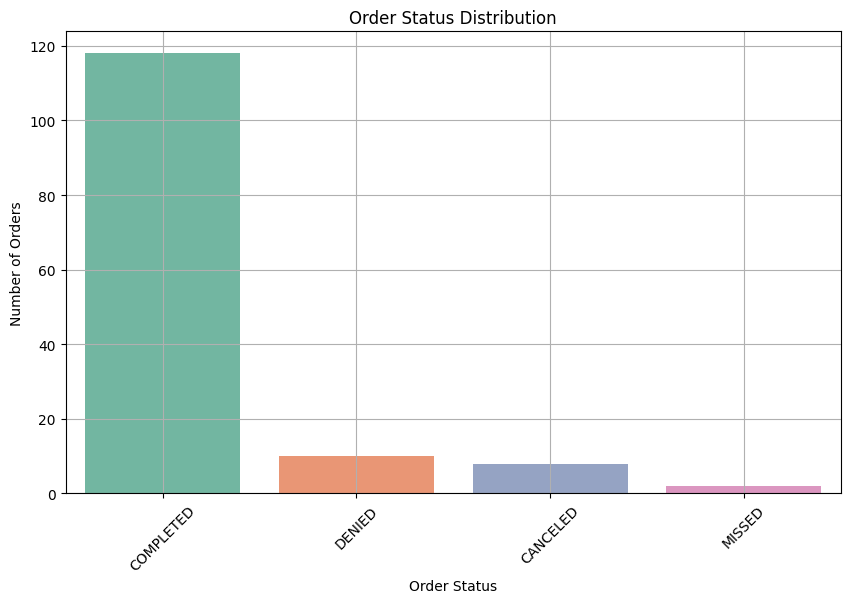

In [28]:
# Count orders by 'status'
order_status_distribution = order_df['status'].value_counts()

# Plot as a histogram (bar chart)
plt.figure(figsize=(10,6))
sns.barplot(x=order_status_distribution.index, y=order_status_distribution.values, palette="Set2")
plt.title('Order Status Distribution')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### 5.Revenue per Order

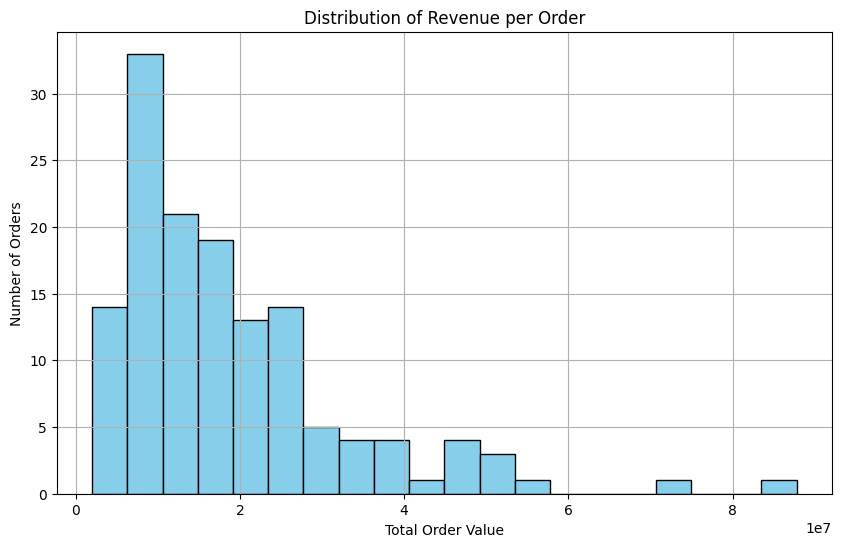

In [29]:
# there is a 'total_amount' column for total order value in the 'orders_df'
# Divide the 'total_amount' by 100
order_df['total_amount'] = order_df['total_amount']*10000

# Plot the histogram
plt.figure(figsize=(10,6))
plt.hist(order_df['total_amount'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Revenue per Order')
plt.xlabel('Total Order Value')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

### 6.Total Quantity per Order

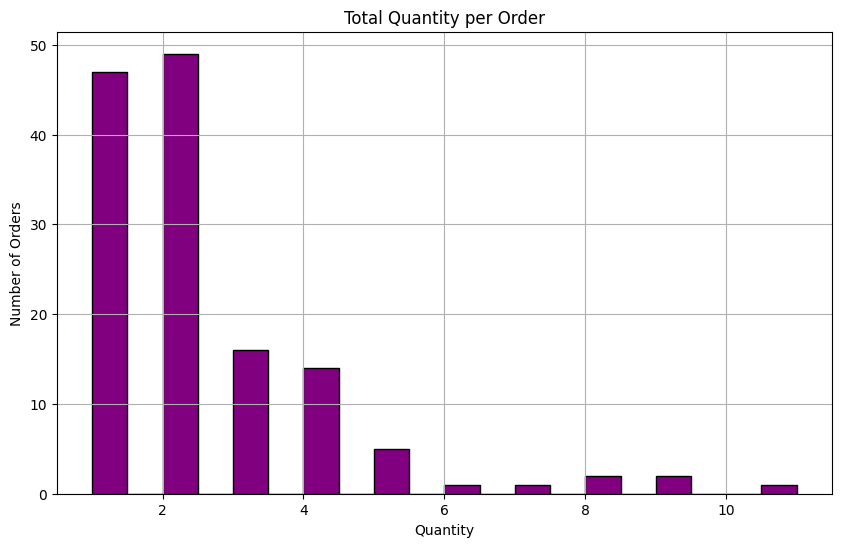

In [30]:
# Group by 'order_id' and sum the 'quantity' per order
total_quantity_per_order = order_items_df.groupby('order_id')['quantity'].sum()

# Plot
plt.figure(figsize=(10,6))
plt.hist(total_quantity_per_order, bins=20, color='purple', edgecolor='black')
plt.title('Total Quantity per Order')
plt.xlabel('Quantity')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

### 7.Revenue by Day of the Week

<ipython-input-31-75b186f21958>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_day.index, y=revenue_by_day.values, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grou

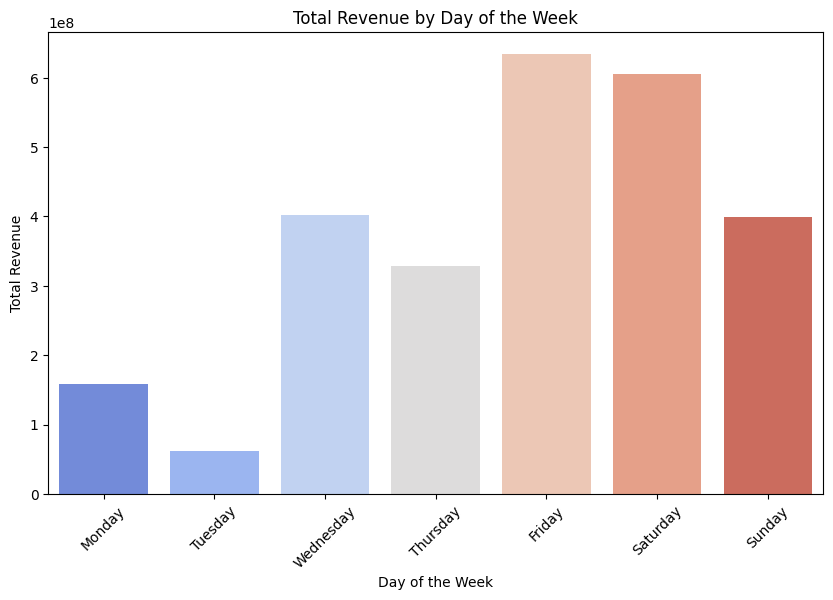

In [31]:
# Extract the day of the week from 'created_at'
order_df['day_of_week'] = order_df['created_at'].dt.day_name()

# Group by 'day_of_week' and sum the 'total_amount'
revenue_by_day = order_df.groupby('day_of_week')['total_amount'].sum()

# Sort the day order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
revenue_by_day = revenue_by_day.reindex(day_order)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=revenue_by_day.index, y=revenue_by_day.values, palette='coolwarm')
plt.title('Total Revenue by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

### 8.Delivery Time Analysis

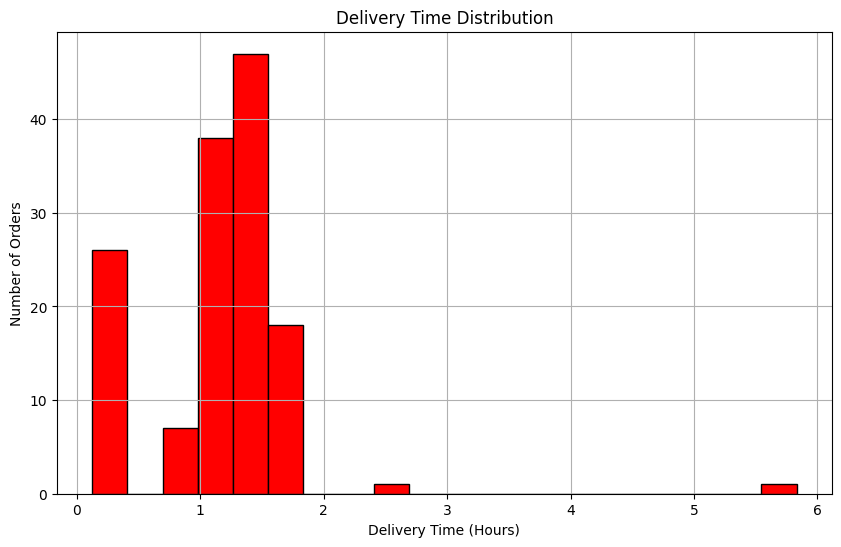

In [32]:
# there is a 'delivery_date_time' column in the order_df
order_df['delivery_date_time'] = pd.to_datetime(order_df['delivery_date_time'])

# Calculate delivery time in hours
order_df['delivery_time_hours'] = (order_df['delivery_date_time'] - order_df['created_at']).dt.total_seconds() / 3600

# Plot the distribution of delivery times
plt.figure(figsize=(10,6))
plt.hist(order_df['delivery_time_hours'].dropna(), bins=20, color='red', edgecolor='black')
plt.title('Delivery Time Distribution')
plt.xlabel('Delivery Time (Hours)')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

### 9.Payment Method Distribution

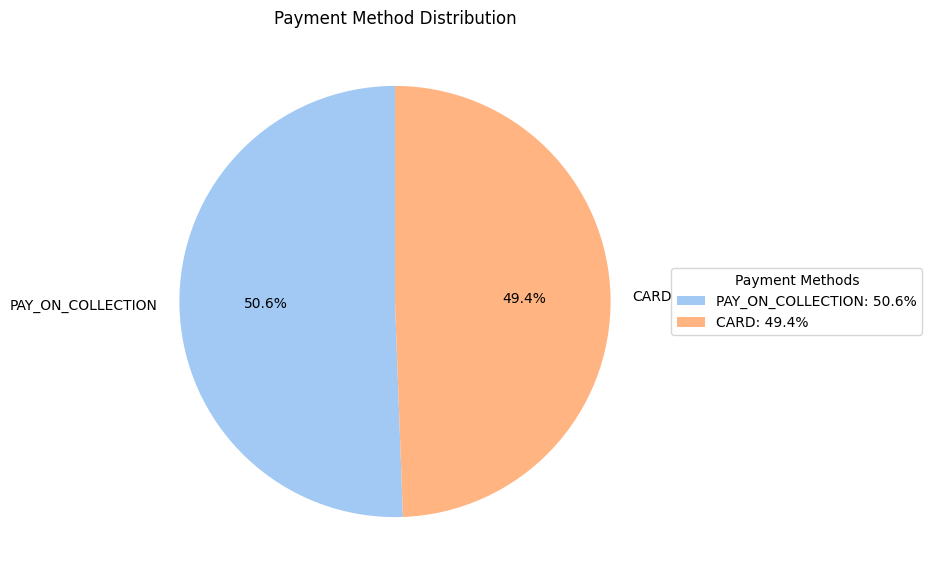

In [33]:
payment_method_distribution = order_df['payment_method'].value_counts()

# Plot
plt.figure(figsize=(7, 7))
plt.pie(payment_method_distribution, labels=payment_method_distribution.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))

# Add legend with percentages
plt.legend(labels=[f"{label}: {percent:.1f}%" for label, percent in zip(payment_method_distribution.index, payment_method_distribution / payment_method_distribution.sum() * 100)],
           title="Payment Methods", loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Payment Method Distribution')
plt.show()

### 10.Customer Segmentation by Order Value

<ipython-input-34-b8476f2e2dfd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_spending.values, y=customer_spending.index, palette='Blues_d')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

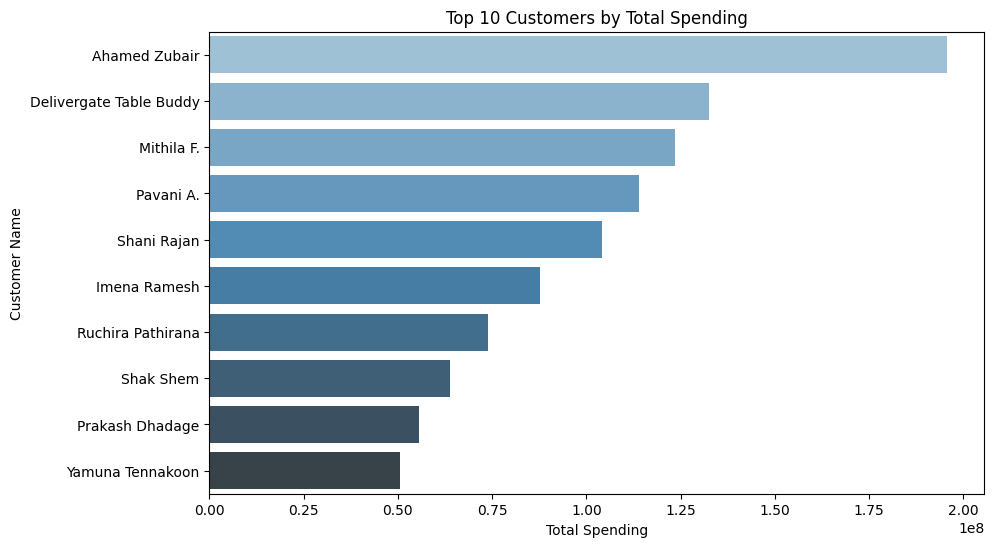

In [34]:
# Group by customer and calculate total spending per customer
customer_spending = order_df.groupby('customer_name')['total_amount'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=customer_spending.values, y=customer_spending.index, palette='Blues_d')
plt.title('Top 10 Customers by Total Spending')
plt.xlabel('Total Spending')
plt.ylabel('Customer Name')
plt.show()

### 11.Order Value vs. Number of Items

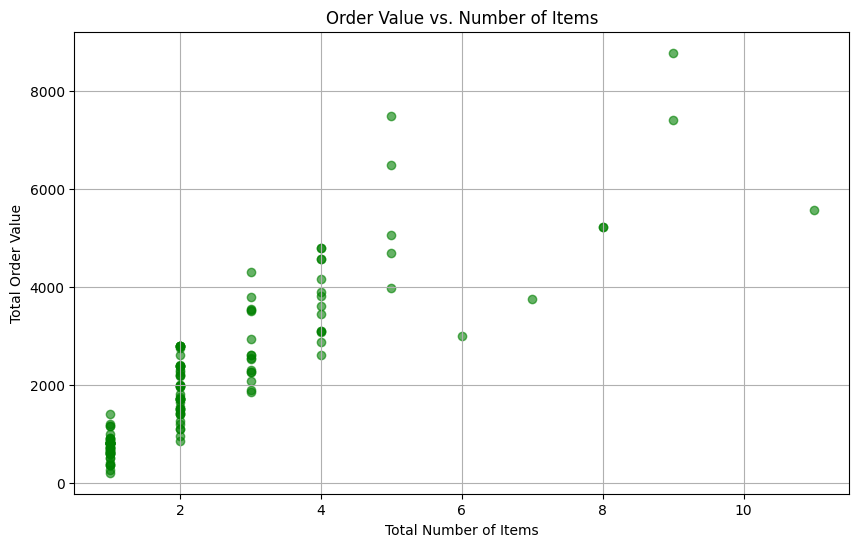

In [35]:
# Group by 'order_id' and calculate total items and total revenue per order
order_value_vs_items = order_items_df.groupby('order_id').agg({'quantity': 'sum', 'total': 'sum'}).reset_index()

# Plot
plt.figure(figsize=(10,6))
plt.scatter(order_value_vs_items['quantity'], order_value_vs_items['total'], alpha=0.6, color='g')
plt.title('Order Value vs. Number of Items')
plt.xlabel('Total Number of Items')
plt.ylabel('Total Order Value')
plt.grid(True)
plt.show()

### 12.Total order value according to shop

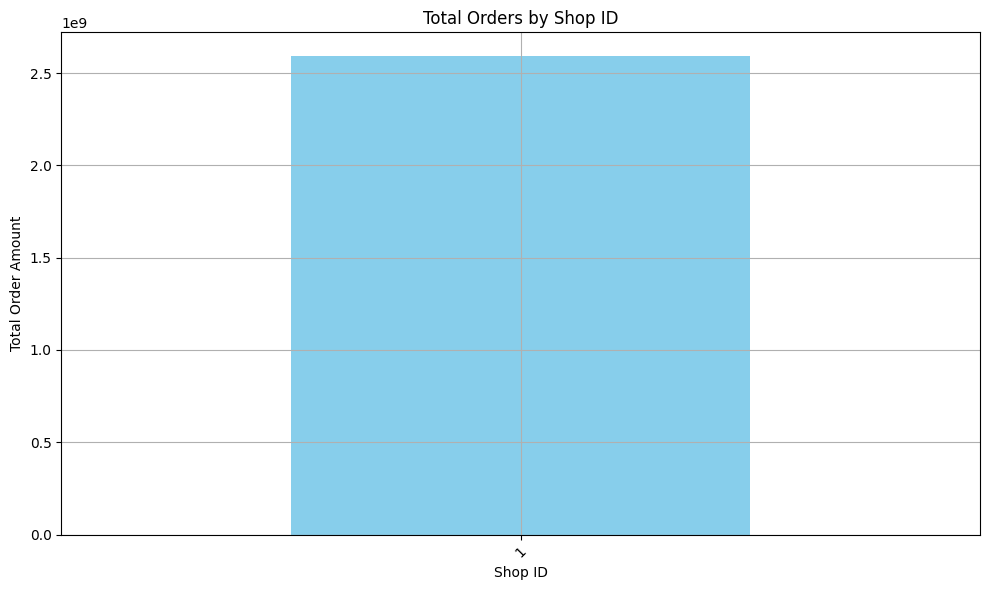

In [36]:
# 'shop_id' is the column for the shop and 'total_amount' is the column for the order total
# Convert 'total_amount' column to numeric
order_df['total_amount'] = pd.to_numeric(order_df['total_amount'], errors='coerce')

# Group by shop_id and sum the order totals
total_by_shop = order_df.groupby('shop_id')['total_amount'].sum()

# Plot the total of the orders according to the shop_id
plt.figure(figsize=(10,6))
total_by_shop.plot(kind='bar', color='skyblue')
plt.title('Total Orders by Shop ID')
plt.xlabel('Shop ID')
plt.ylabel('Total Order Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### 13.Total order value according to the device platform

In [37]:
print(total_by_shop)

shop_id
1    2590880000
Name: total_amount, dtype: int64


In [38]:
print(order_df[['device_platform', 'total_amount']].isnull().sum())

device_platform    88
total_amount        0
dtype: int64


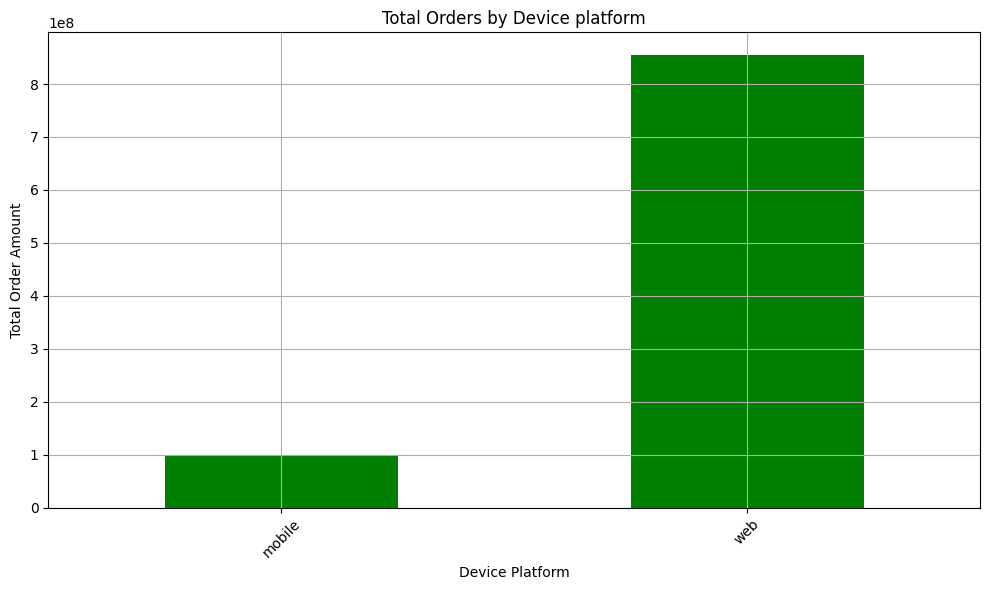

In [39]:
# 'device_platform' is the column for the device and 'total_amount' is the column for the order total
# Convert 'total_amount' column to numeric
#order_df['total_amount'] = pd.to_numeric(order_df['total_amount'], errors='coerce')

# Group by shop_id and sum the order totals
total_by_shop = order_df.groupby('device_platform')['total_amount'].sum()

# Plot the total of the orders according to the shop_id
plt.figure(figsize=(10,6))
total_by_shop.plot(kind='bar', color='green')
plt.title('Total Orders by Device platform')
plt.xlabel('Device Platform')
plt.ylabel('Total Order Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### 14.Shipping method Distribution

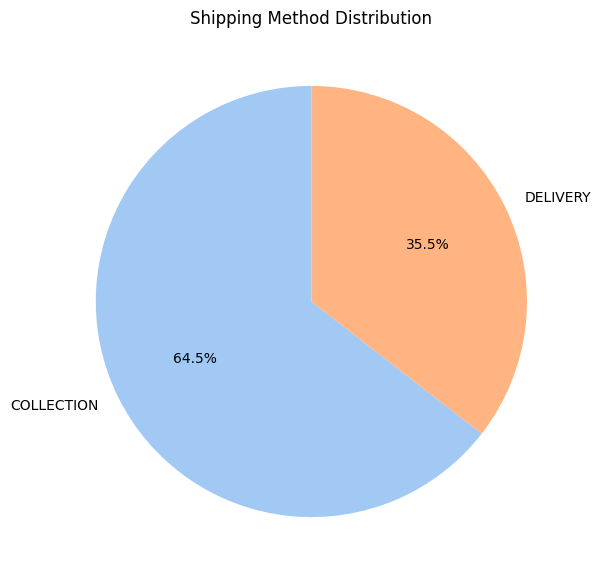

In [40]:
# there is a 'shipping_method' column in the order_df
shipping_method_distribution = order_df['shipping_method'].value_counts()

# Plot
plt.figure(figsize=(7,7))
plt.pie(shipping_method_distribution, labels=shipping_method_distribution.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Shipping Method Distribution')
plt.show()

### 15.Total Discounts over months

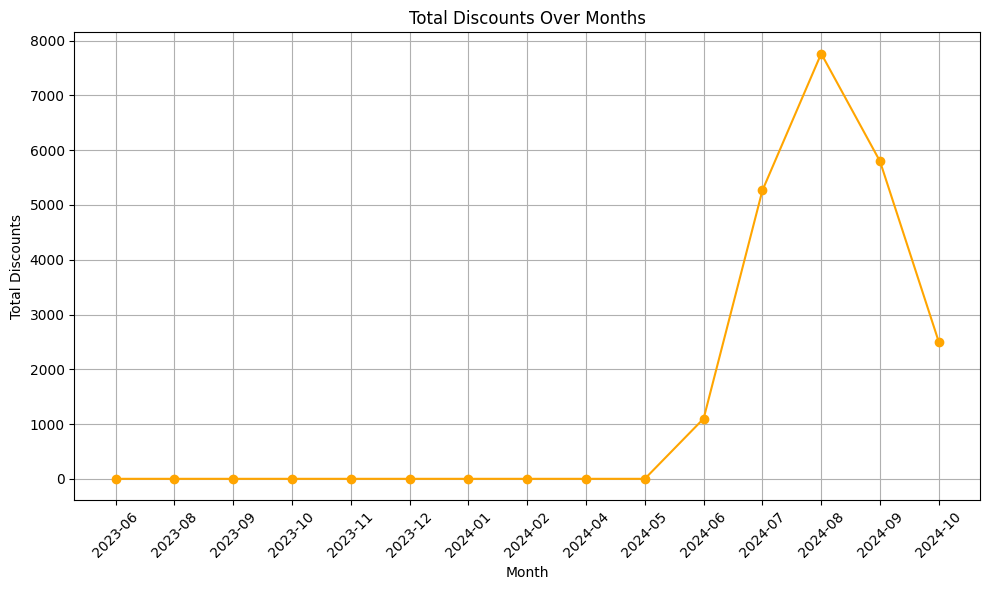

In [41]:
# Ensure 'discount' is numeric (replace 'discount' with your actual discount column name)
order_df['discount'] = pd.to_numeric(order_df['discount'], errors='coerce')

# Group by month and sum the discounts
discounts_by_month = order_df.groupby(order_df['created_at'].dt.to_period('M'))['discount'].sum()

# Plot the total discounts over time
plt.figure(figsize=(10, 6))
plt.plot(discounts_by_month.index.astype(str), discounts_by_month.values, marker='o', color='orange')  # Convert PeriodIndex to string for plotting
plt.title('Total Discounts Over Months')
plt.xlabel('Month')
plt.ylabel('Total Discounts')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()  # Adjust layout for better fit
plt.show()

### 16.Order history Tracking for a single customer

In [42]:
# Ensure 'created_at' is in datetime format
order_df['created_at'] = pd.to_datetime(order_df['created_at'])

# Identify the last order date for each customer
last_order_dates = order_df.groupby('customer_id')['created_at'].max()

# Get the current date
current_date = pd.to_datetime('today')

# Calculate the time since the last order
inactive_customers = last_order_dates[last_order_dates < (current_date - pd.DateOffset(months=1))]

# Convert to DataFrame if needed
inactive_customers_df = inactive_customers.reset_index()
inactive_customers_df.columns = ['customer_id','last_order_date']

# Display inactive customers
print(inactive_customers_df)

    customer_id     last_order_date
0             1 2023-06-05 14:17:22
1             2 2023-06-06 11:53:19
2             3 2023-06-06 18:59:52
3             4 2024-06-06 18:43:49
4             5 2023-06-07 14:22:32
..          ...                 ...
87          138 2024-08-22 11:35:27
88          139 2024-08-24 15:28:19
89          141 2024-08-24 16:16:12
90          142 2024-09-04 12:02:20
91          143 2024-08-29 22:14:06

[92 rows x 2 columns]


In [43]:
# Merge with customer DataFrame to get names
inactive_customers_with_names = inactive_customers_df.merge(
    order_df[['customer_id', 'customer_name']],
    on='customer_id',
    how='left'
)

# Display inactive customers with names
print(inactive_customers_with_names[['customer_name', 'last_order_date']])

    customer_name     last_order_date
0        Kelee D. 2023-06-05 14:17:22
1          aje A. 2023-06-06 11:53:19
2        suren K. 2023-06-06 18:59:52
3        Miard Z. 2024-06-06 18:43:49
4        Miard Z. 2024-06-06 18:43:49
..            ...                 ...
118  Sanup Gurung 2024-08-24 16:16:12
119     Pavani A. 2024-09-04 12:02:20
120     Pavani A. 2024-09-04 12:02:20
121     Pavani A. 2024-09-04 12:02:20
122     Rebeca B. 2024-08-29 22:14:06

[123 rows x 2 columns]


In [44]:
# Select the desired columns for export
output_df = inactive_customers_with_names[['customer_name', 'last_order_date']]

# Save the DataFrame to a CSV file
output_file_path = 'inactive_customers.csv'
output_df.to_csv(output_file_path, index=False)

files.download('inactive_customers.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>